### Check if the data is balanced

In [ ]:
import os


BASE_DIR = os.path.abspath("../") 
input_root = os.path.join(BASE_DIR, "data/raw/train")


for folder in os.listdir(input_root):
    compteur = 0
    for images in os.listdir(os.path.join(input_root, folder)):
        compteur += 1
    print(f"{folder} : {compteur} images")
        


        


airplane : 9000 images
automobile : 9000 images
bird : 9000 images
cat : 9000 images
deer : 9000 images
dog : 9000 images
frog : 9000 images
horse : 9000 images
ship : 9000 images
truck : 9000 images


### Check Sizes of the images

In [9]:
import os
from PIL import Image
from collections import Counter


BASE_DIR = os.path.abspath("../")
input_root = os.path.join(BASE_DIR, "data/raw/train")


sizes = []

for folder in os.listdir(input_root):
    print(folder)
    compteur = 0
    folder_path = os.path.join(input_root, folder)
    for img_file in os.listdir(folder_path):
        compteur += 1
        if compteur % 1000 == 0:
            print(f"{compteur} images processed")
        img_path = os.path.join(folder_path, img_file)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size) 
        except Exception as e:
            print(f"Failed to read {img_path}: {e}")


counted_sizes = Counter(sizes)
print("Image sizes and their frequencies:")
for size, count in counted_sizes.items():
    print(f"{size} : {count} images")

airplane
1000 images processed
2000 images processed
3000 images processed
4000 images processed
5000 images processed
6000 images processed
7000 images processed
8000 images processed
9000 images processed
automobile
1000 images processed
2000 images processed
3000 images processed
4000 images processed
5000 images processed
6000 images processed
7000 images processed
8000 images processed
9000 images processed
bird
1000 images processed
2000 images processed
3000 images processed
4000 images processed
5000 images processed
6000 images processed
7000 images processed
8000 images processed
9000 images processed
cat
1000 images processed
2000 images processed
3000 images processed
4000 images processed
5000 images processed
6000 images processed
7000 images processed
8000 images processed
9000 images processed
deer
1000 images processed
2000 images processed
3000 images processed
4000 images processed
5000 images processed
6000 images processed
7000 images processed
8000 images processe


Processing folder: airplane
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'airplane':


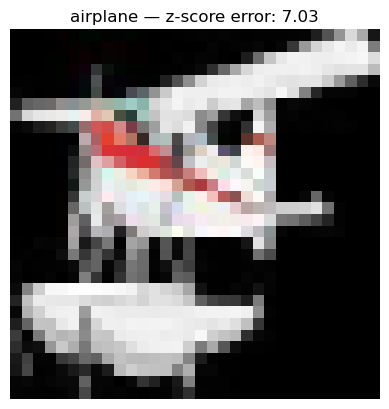

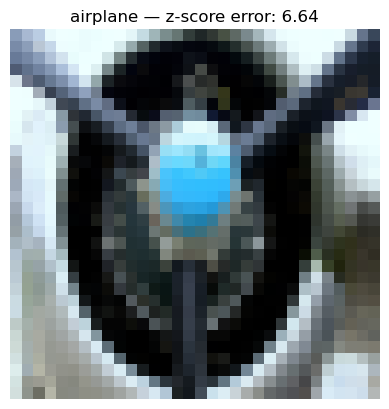

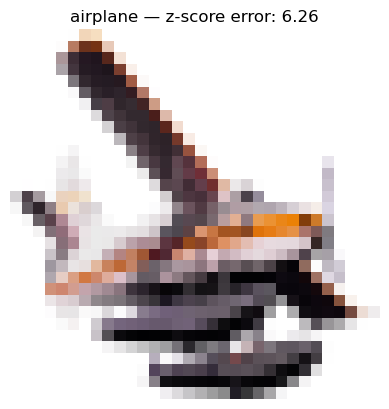


Processing folder: automobile
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'automobile':


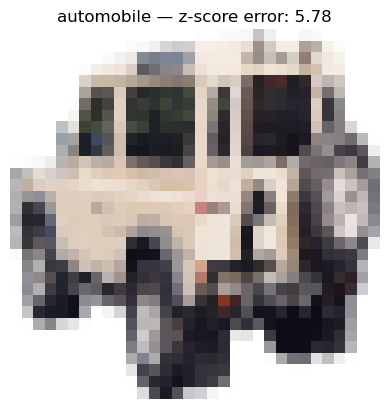

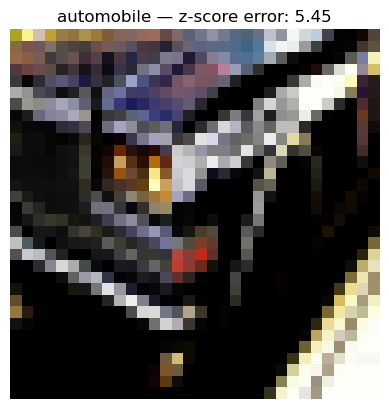

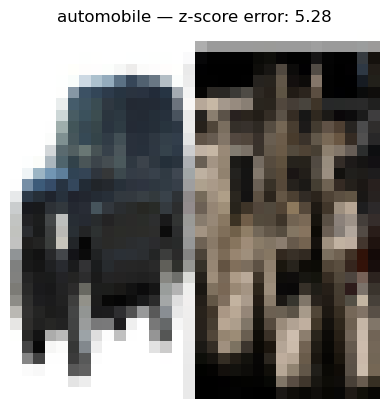


Processing folder: bird
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'bird':


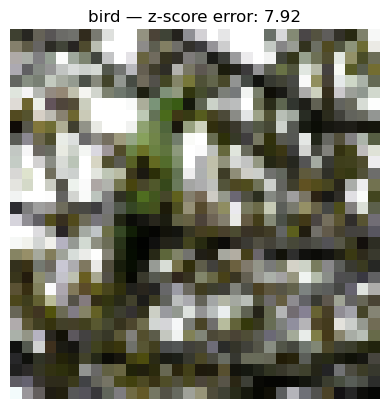

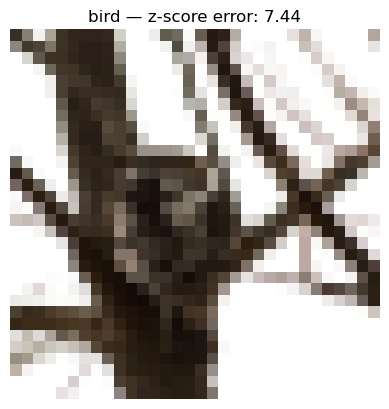

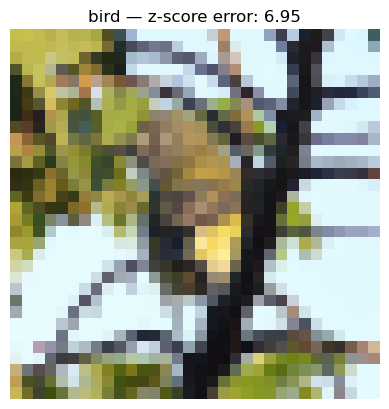


Processing folder: cat
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'cat':


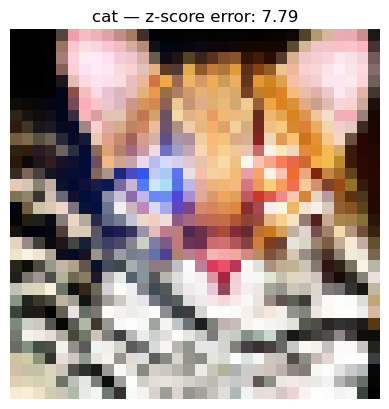

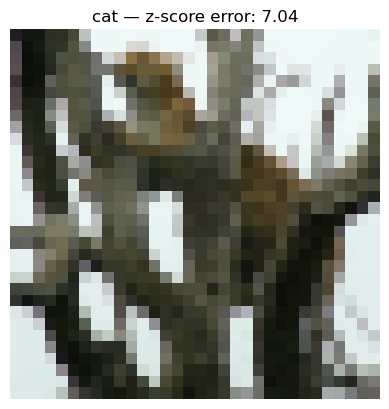

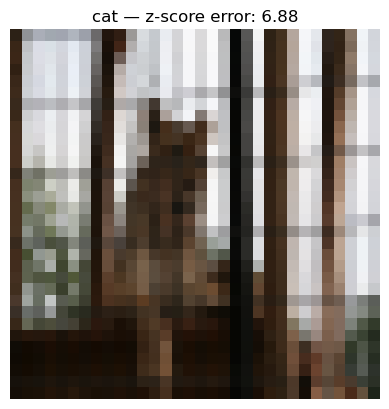


Processing folder: deer
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'deer':


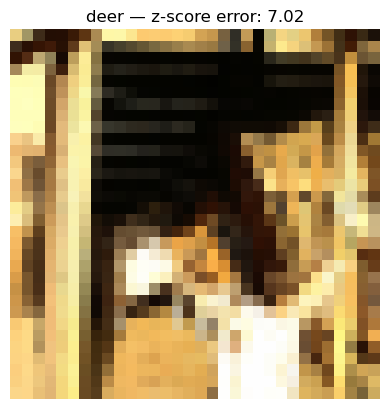

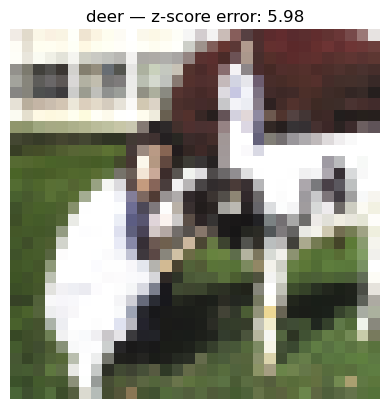

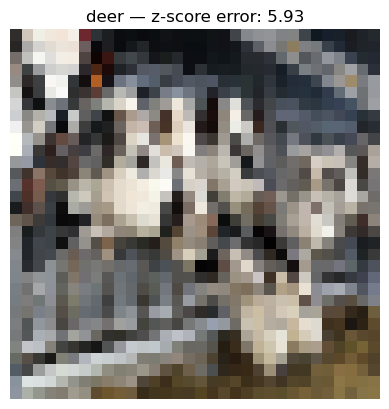


Processing folder: dog
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'dog':


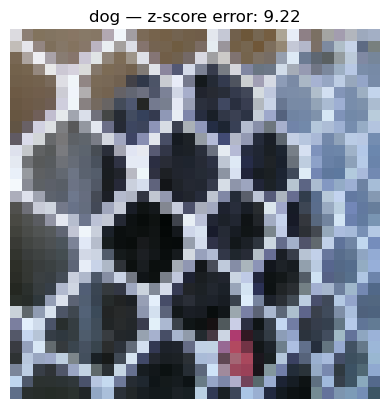

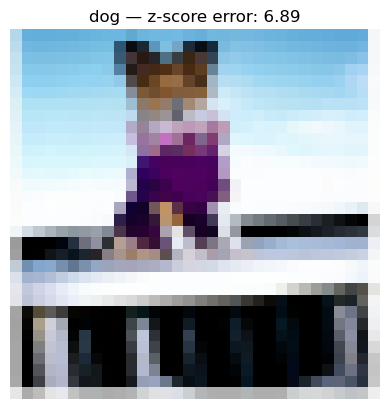

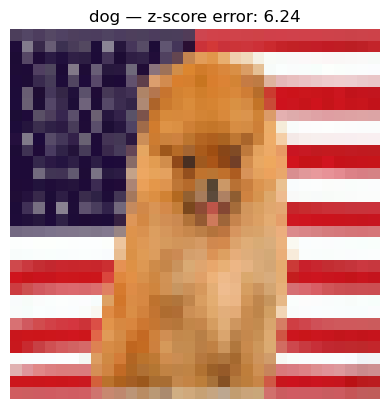


Processing folder: frog
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'frog':


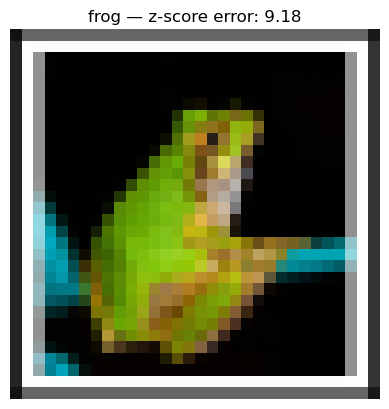

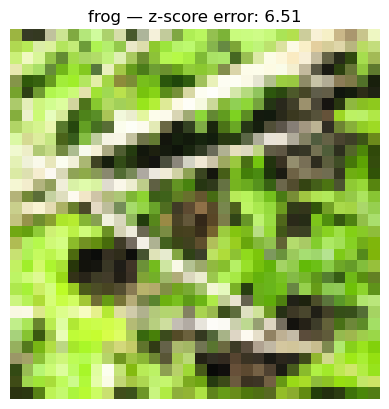

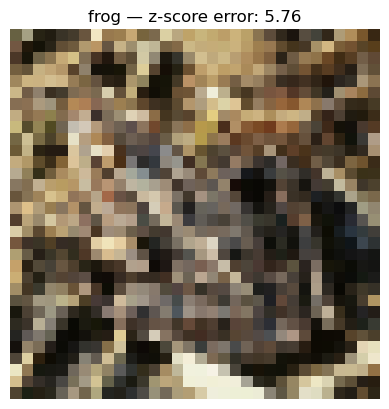


Processing folder: horse
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'horse':


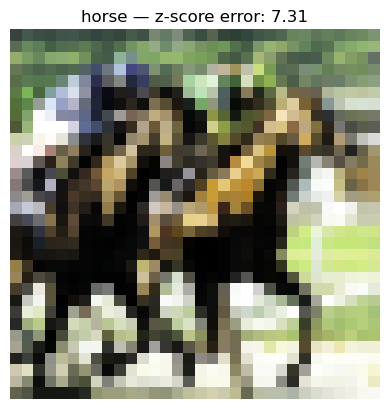

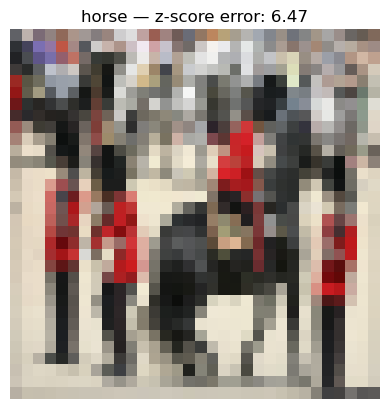

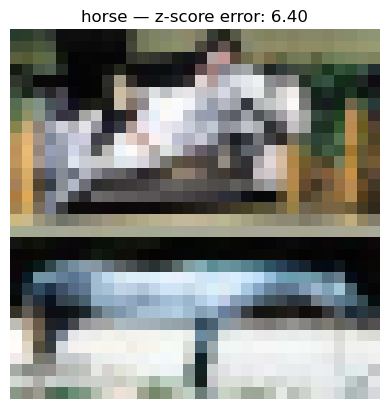


Processing folder: ship
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'ship':


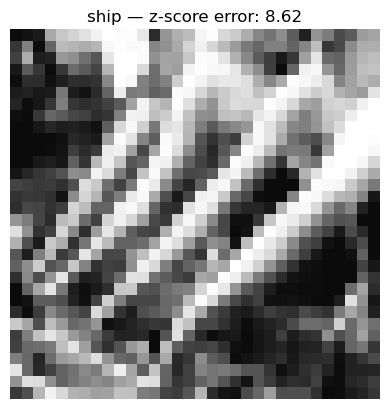

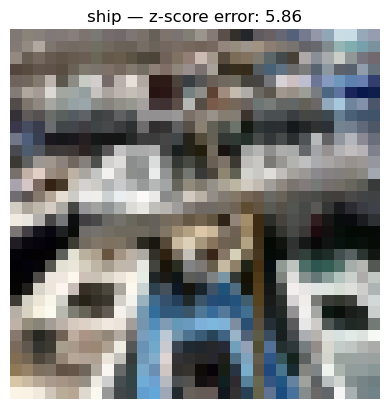

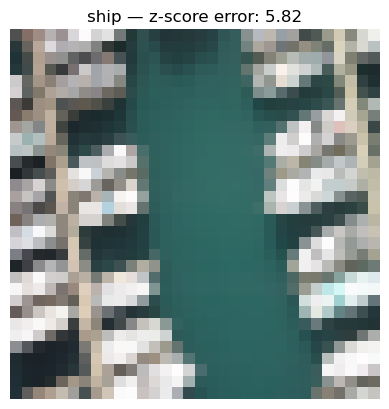


Processing folder: truck
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Top 3 outliers in 'truck':


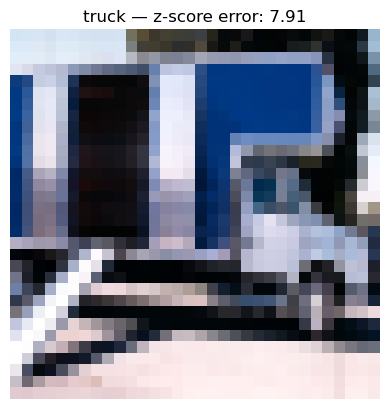

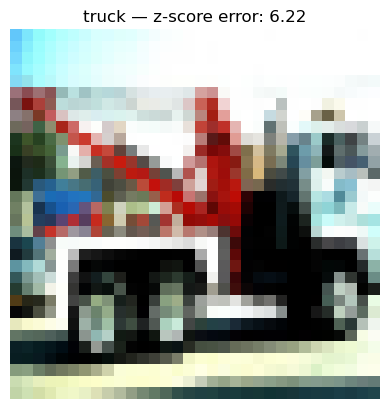

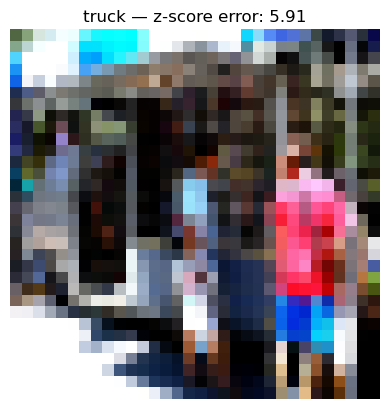

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


BASE_DIR = os.path.abspath("../")
input_root = os.path.join(BASE_DIR, "data/raw/train")
img_size = (32, 32)
n_components = 50

# Process each class separately
for folder in os.listdir(input_root):
    print(f"\nProcessing folder: {folder}")
    folder_path = os.path.join(input_root, folder)

    images = []
    image_paths = []

    compteur = 0
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        compteur += 1
        if compteur % 1000 == 0:
            print(f"  {compteur} images processed")
        try:
            img = Image.open(img_path).convert("L")
            img_array = np.array(img).flatten()
            images.append(img_array)
            image_paths.append(img_path)
        except Exception as e:
            print(f"  Skipping {img_path}: {e}")

    if len(images) < n_components:
        print(f"  Not enough images for PCA in folder '{folder}', skipping.")
        continue

    X = np.array(images)

    # PCA and reconstruction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2, axis=1)

    # Normalize error (z-score)
    scaler = StandardScaler()
    normalized_error = scaler.fit_transform(
        reconstruction_error.reshape(-1, 1)
    ).flatten()

    # Top 3 outliers (highest normalized error)
    top_outliers_idx = np.argsort(normalized_error)[-3:]

    print(f"  Top 3 outliers in '{folder}':")
    for idx in reversed(top_outliers_idx):
        img = Image.open(image_paths[idx])
        plt.imshow(img, cmap="gray")
        plt.title(f"{folder} — z-score error: {normalized_error[idx]:.2f}")
        plt.axis("off")
        plt.show()


📁 Processing folder: airplane
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'airplane' based on color histogram distance:


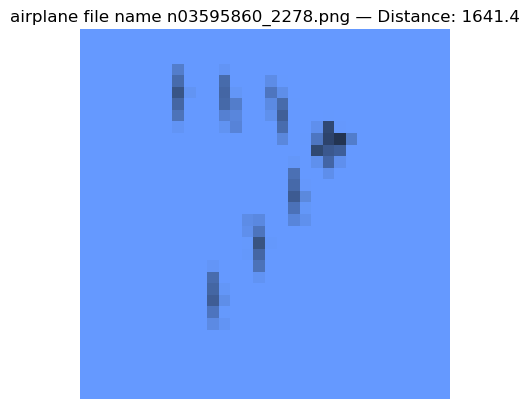

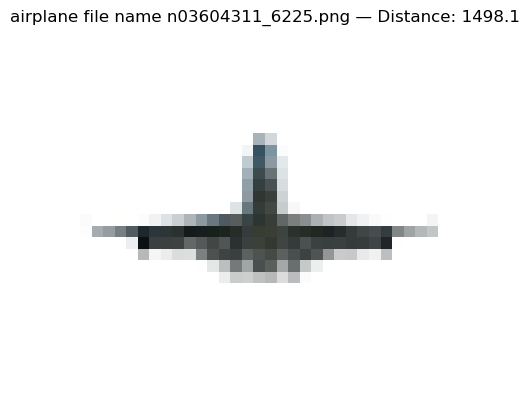

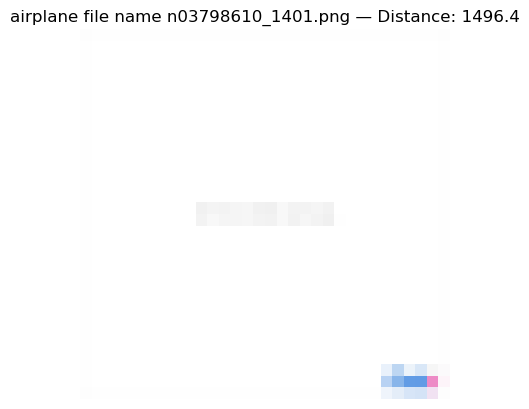


📁 Processing folder: automobile
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'automobile' based on color histogram distance:


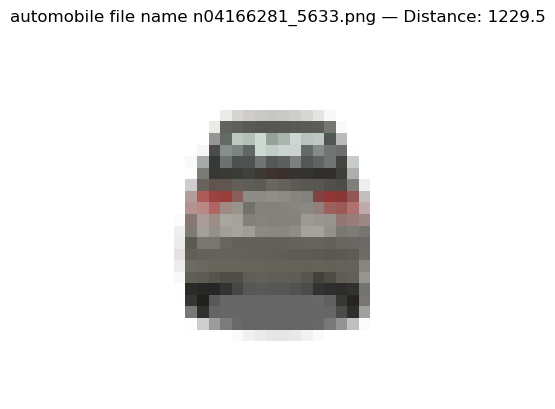

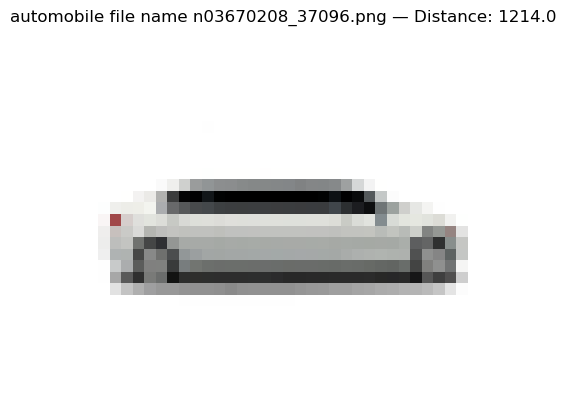

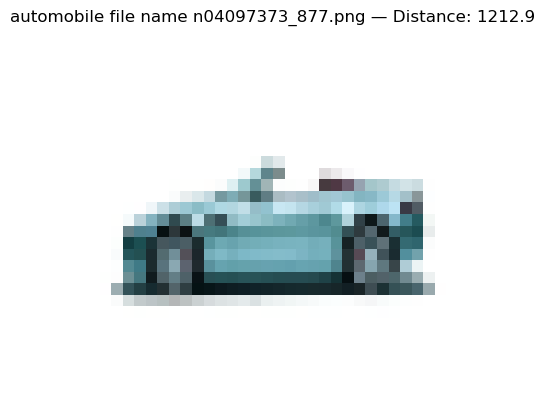


📁 Processing folder: bird
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'bird' based on color histogram distance:


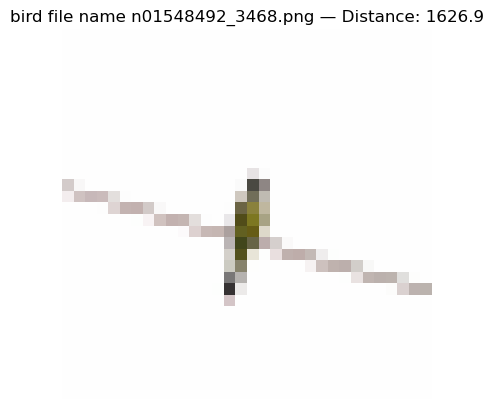

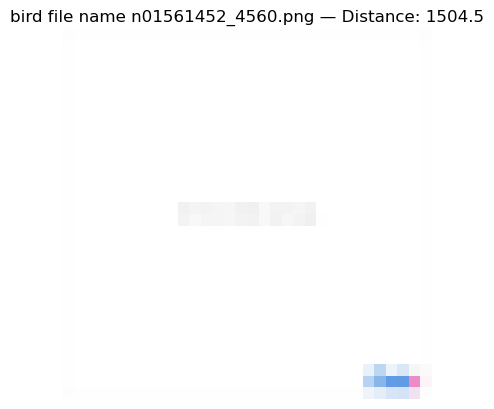

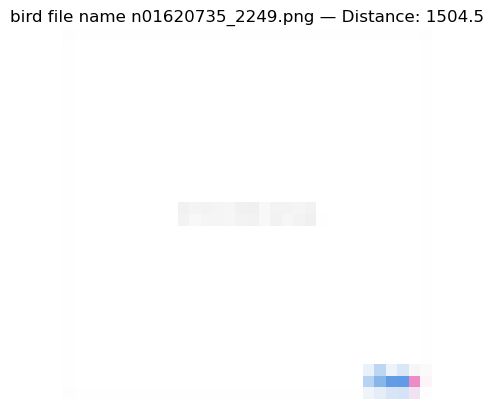


📁 Processing folder: cat
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'cat' based on color histogram distance:


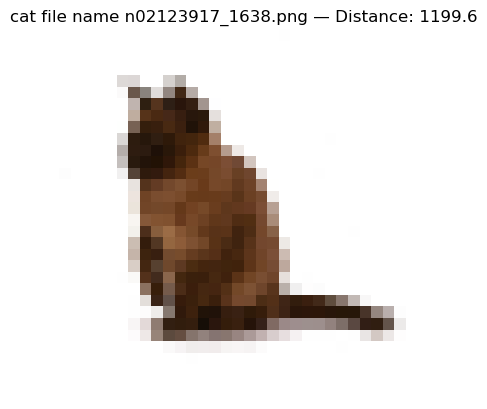

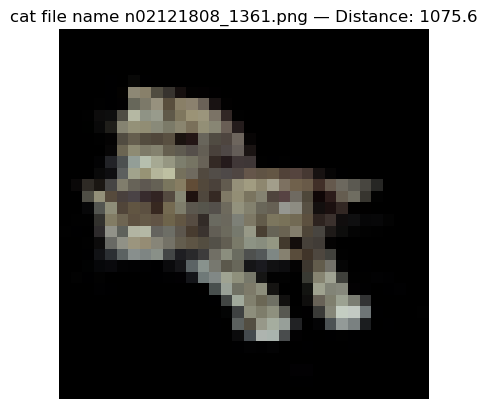

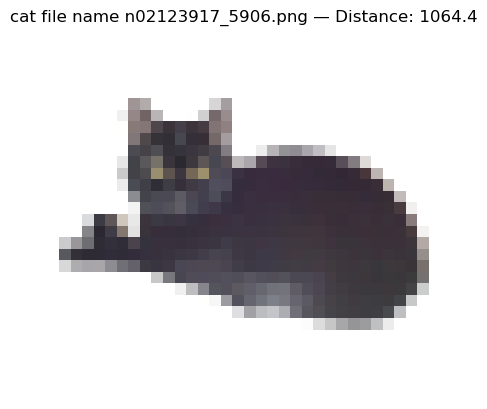


📁 Processing folder: deer
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'deer' based on color histogram distance:


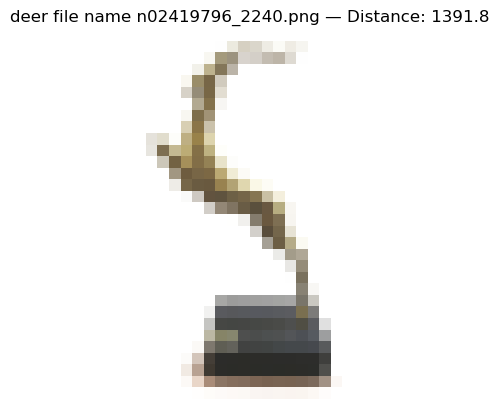

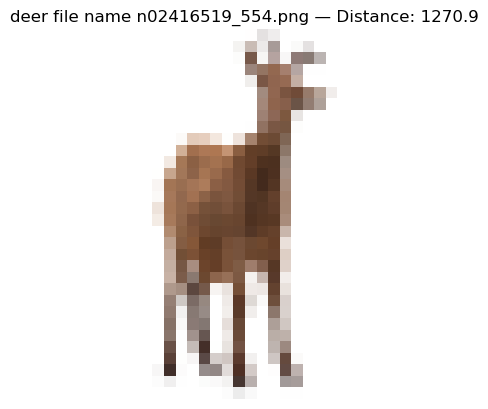

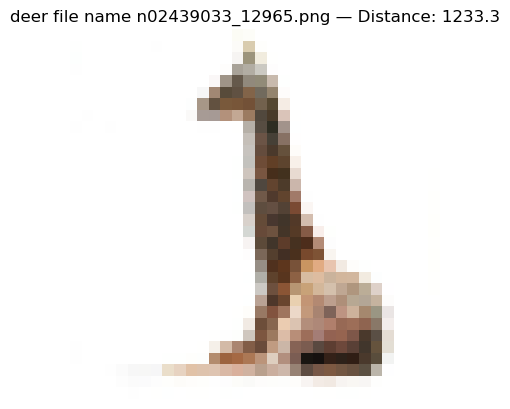


📁 Processing folder: dog
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'dog' based on color histogram distance:


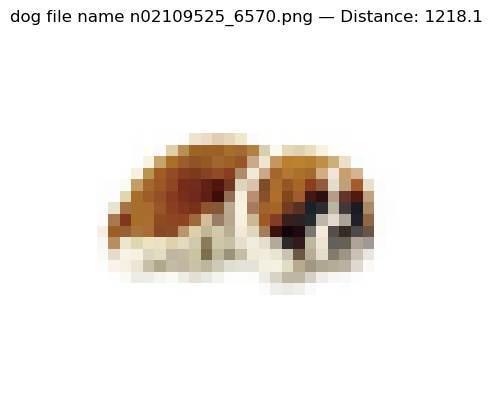

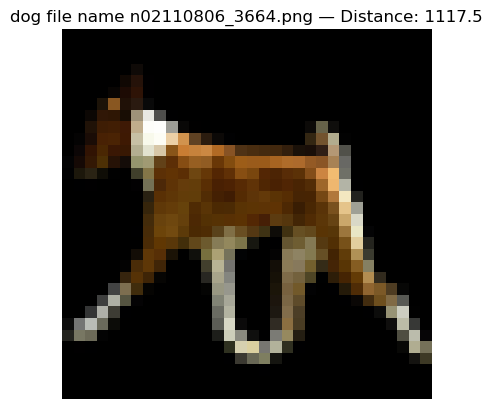

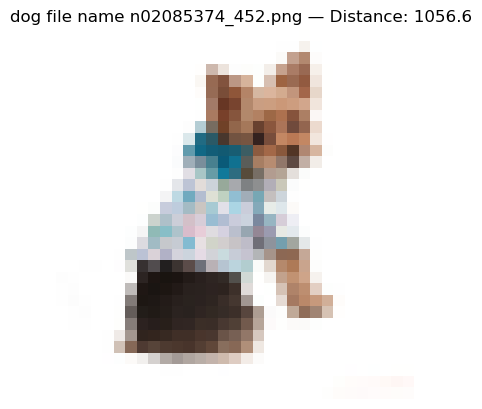


📁 Processing folder: frog
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'frog' based on color histogram distance:


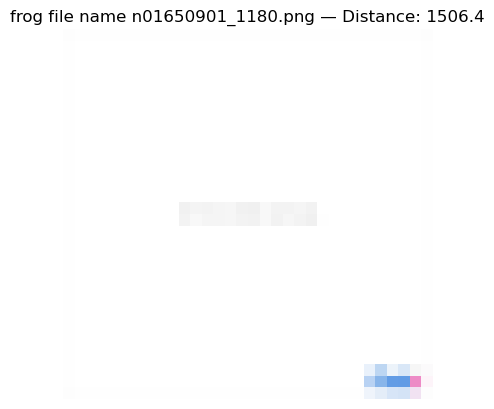

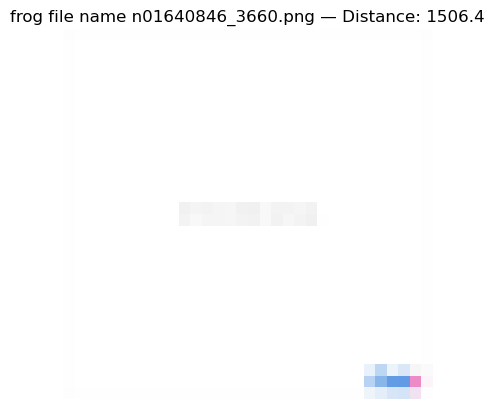

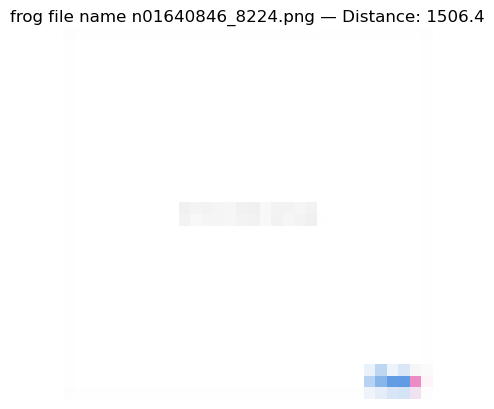


📁 Processing folder: horse
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'horse' based on color histogram distance:


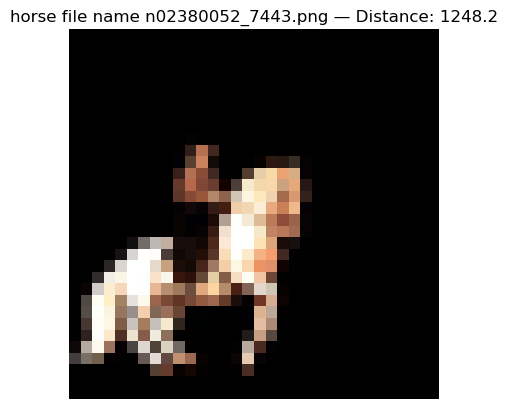

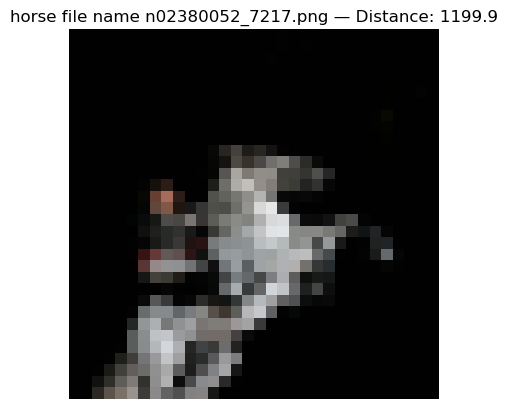

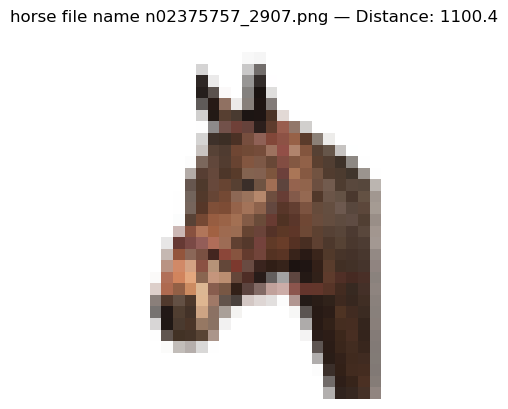


📁 Processing folder: ship
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'ship' based on color histogram distance:


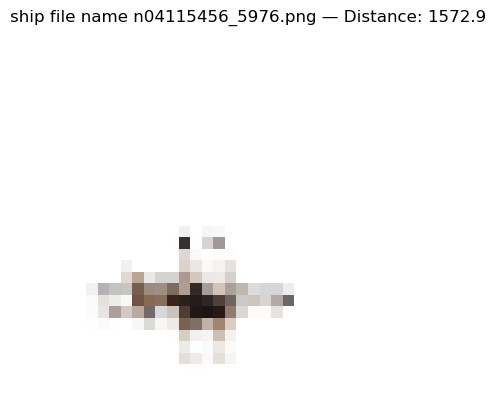

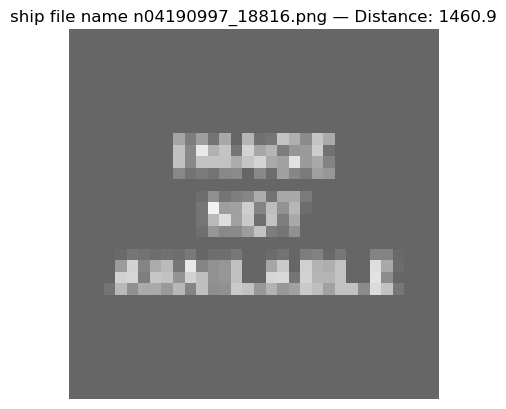

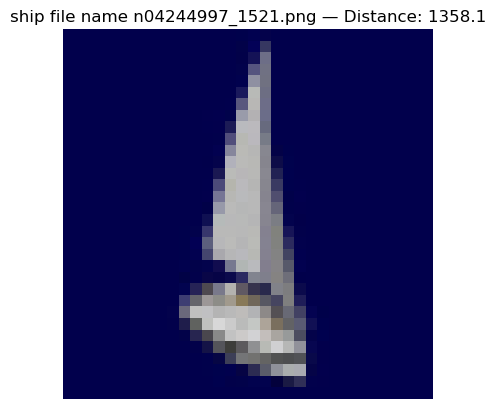


📁 Processing folder: truck
  1000 images processed
  2000 images processed
  3000 images processed
  4000 images processed
  5000 images processed
  6000 images processed
  7000 images processed
  8000 images processed
  9000 images processed
  Showing top 3 outliers for 'truck' based on color histogram distance:


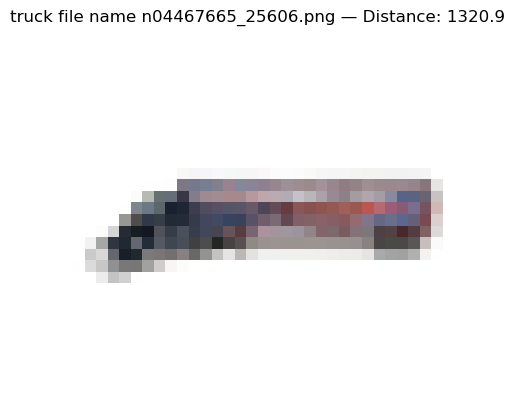

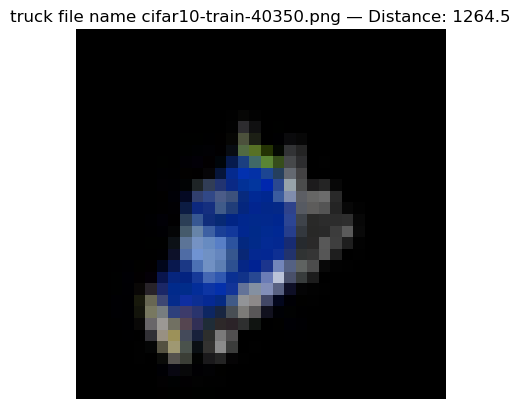

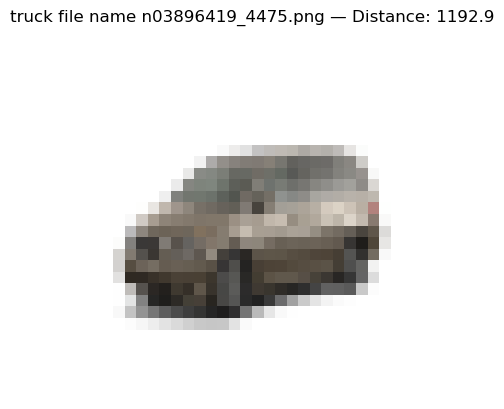

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean


BASE_DIR = os.path.abspath("../")
input_root = os.path.join(BASE_DIR, "data/raw/train")
img_size = (32, 32)


def get_histogram(img):
    hist_r = np.histogram(img[:, :, 0], bins=256, range=(0, 255))[0]
    hist_g = np.histogram(img[:, :, 1], bins=256, range=(0, 255))[0]
    hist_b = np.histogram(img[:, :, 2], bins=256, range=(0, 255))[0]
    return np.concatenate([hist_r, hist_g, hist_b])



for folder in os.listdir(input_root):
    print(f"\n📁 Processing folder: {folder}")
    folder_path = os.path.join(input_root, folder)

    histograms = []
    image_paths = []
    compteur = 0

    for img_file in os.listdir(folder_path):
        compteur += 1
        if compteur % 1000 == 0:
            print(f"  {compteur} images processed")

        img_path = os.path.join(folder_path, img_file)
        try:
            img = Image.open(img_path).convert("RGB").resize(img_size)
            img_np = np.array(img)
            hist = get_histogram(img_np)
            histograms.append(hist)
            image_paths.append(img_path)
        except Exception as e:
            print(f"  Failed to process {img_path}: {e}")

    
    if not histograms:
        print(f"  No valid images found in folder '{folder}'.")
        continue

    
    histograms = np.array(histograms)
    mean_hist = np.mean(histograms, axis=0)
    distances = np.array([euclidean(h, mean_hist) for h in histograms])

    
    top_outliers_idx = np.argsort(distances)[-3:]

    print(f"  Showing top 3 outliers for '{folder}' based on color histogram distance:")
    for idx in reversed(top_outliers_idx):
        img = Image.open(image_paths[idx])
        plt.imshow(img)
        file_name = os.path.basename(image_paths[idx])
        plt.title(f"{folder} file name {file_name} — Distance: {distances[idx]:.1f}")
        plt.axis("off")
        plt.show()

regarding that we can think if it is interesting to delete the outliers, I mean if the the model learns too much on a uniform class, may be the model will have difficulties to recognize different images within the class, so we have to be careful on how we delete the outliers 